<a href="https://colab.research.google.com/github/nicoyogis/TUBES-TKC/blob/main/Tugas6_7_TKC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import json
import os  # Create directories, list files
import zipfile
import shutil
import matplotlib.pyplot as plt
import matplotlib.image as mping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Conv2D, MaxPool2D, Dropout, Flatten, BatchNormalization 
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.optimizers import SGD
from sklearn.metrics import classification_report, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
import time

In [ ]:
input_folder="dataset"
base_dir="dataset_split"

In [ ]:
import splitfolders
splitfolders.ratio(input= input_folder, output= base_dir, seed=1337, ratio=(0.8, 0.19, 0.01))

In [ ]:
import os
Train = os.path.join(base_dir, 'Train')
Test = os.path.join(base_dir, 'Test')
Val = os.path.join(base_dir, 'Val')

In [ ]:
file_train_effusion = os.listdir(Train + "/Effusion")
file_train_normal = os.listdir(Train + "/Normal")
file_train_tube = os.listdir(Train + "/Tube")

file_val_effusion = os.listdir(Val + "/Effusion")
file_val_normal = os.listdir(Val + "/Normal")
file_val_tube = os.listdir(Val + "/Tube")

file_test_effusion = os.listdir(Test + "/Effusion")
file_test_normal = os.listdir(Test + "/Normal")
file_test_tube = os.listdir(Test + "/Tube")


print("total training Effusion: " + str(len(file_train_effusion)))
print("total training Normal : " + str(len(file_train_normal)))
print("total training Tube : " + str(len(file_train_tube)))

print("total val Effusion : " + str(len(file_val_effusion)))
print("total val Normal : " + str(len(file_val_normal)))
print("total val Tube  : " + str(len(file_val_tube)))

print("total test Effusion : " + str(len(file_test_effusion)))
print("total test Normal : " + str(len(file_test_normal)))
print("total test Tube : " + str(len(file_test_tube)))

total training Effusion: 144
total training Normal : 144
total training Tube : 77
total val Effusion : 34
total val Normal : 34
total val Tube  : 18
total test Effusion : 2
total test Normal : 2
total test Tube : 2


In [ ]:
# define generator
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_gen = ImageDataGenerator(
    
  #  shear_range = 0.2,
  #  zoom_range=0.2,
  #  horizontal_flip=True,
  #  vertical_flip=True,
  #  rotation_range=20,
  #  width_shift_range=0.2,
  #  height_shift_range=0.2,
    rescale = 1./255,
    rotation_range=20, 
    width_shift_range=0.1, 
    height_shift_range=0.1, 
    shear_range=0.2, 
    zoom_range=0.2, horizontal_flip=True, 
    vertical_flip=True
    
)

val_gen = ImageDataGenerator(rescale = 1./255)

In [ ]:
test_gen = ImageDataGenerator(rescale = 1./255)

In [ ]:
batch_size = 8

In [ ]:
train_generator = train_gen.flow_from_directory(
    Train,
    target_size=(150, 150),
    class_mode='categorical',
    color_mode="rgb",
    shuffle=True,
    batch_size=batch_size
)

validation_generator = val_gen.flow_from_directory(
    Val,
    target_size=(150,150),
    class_mode='categorical',
    color_mode="rgb",
    shuffle=False,
    batch_size=batch_size
)

test_generator = test_gen.flow_from_directory(
    Val,
    target_size=(150,150),
    class_mode='categorical',
    color_mode="rgb",
    shuffle=False,
    batch_size=batch_size
)

Found 364 images belonging to 3 classes.
Found 84 images belonging to 3 classes.
Found 84 images belonging to 3 classes.


In [ ]:
train_generator.class_indices
validation_generator.class_indices

{'Effusion': 0, 'Normal': 1, 'Tube': 2}

In [ ]:
# Feature Extraction Layer
model2 = Sequential()

model2.add(InputLayer(input_shape=[150,150,3]))

model2.add(Conv2D(filters=8, kernel_size=3, strides=1,  padding='same', activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPool2D(pool_size=2, padding='same'))


model2.add(Conv2D(filters=16, kernel_size=3, strides=1,  padding='same', activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPool2D(pool_size=2, padding='same'))


model2.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPool2D(pool_size=2, padding='same'))


model2.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPool2D(pool_size=2, padding='same'))


model2.add(Conv2D(filters=128, kernel_size=3, strides=1, padding='same', activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPool2D(pool_size=2, padding='same'))


model2.add(Conv2D(filters=256, kernel_size=3, strides=1, padding='same', activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPool2D(pool_size=2, padding='same'))



In [ ]:
model2.add(Flatten())

In [ ]:
# Fully Connected Layer
model2.add(Dense(128, activation='relu')) #hidden
model2.add(Dropout(0.5))
model2.add(Dense(256, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(3, activation='softmax'))

In [ ]:
# Compile model 1
model2.compile(optimizer= Adam(learning_rate=0.0001),
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [ ]:
# Print model summary
print(model2.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 8)       224       
                                                                 
 batch_normalization (BatchN  (None, 150, 150, 8)      32        
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 16)        1168      
                                                                 
 batch_normalization_1 (Batc  (None, 75, 75, 16)       64        
 hNormalization)                                                 
                                                        

In [ ]:
H2 = model2.fit(train_generator, epochs=100, validation_data = validation_generator,validation_steps = len(validation_generator))

Epoch 1/100
46/46 [==============================] - 9s 124ms/step - loss: 1.4673 - accuracy: 0.4231 - val_loss: 1.0960 - val_accuracy: 0.3929
Epoch 2/100
46/46 [==============================] - 4s 78ms/step - loss: 1.0549 - accuracy: 0.5110 - val_loss: 1.2407 - val_accuracy: 0.3929
Epoch 3/100
46/46 [==============================] - 3s 75ms/step - loss: 1.0602 - accuracy: 0.5247 - val_loss: 1.4832 - val_accuracy: 0.3929
Epoch 4/100
46/46 [==============================] - 3s 76ms/step - loss: 0.9453 - accuracy: 0.5742 - val_loss: 1.9987 - val_accuracy: 0.3929
Epoch 5/100
46/46 [==============================] - 4s 77ms/step - loss: 0.9072 - accuracy: 0.5962 - val_loss: 2.2776 - val_accuracy: 0.3929
Epoch 6/100
46/46 [==============================] - 4s 76ms/step - loss: 0.8909 - accuracy: 0.6071 - val_loss: 2.1797 - val_accuracy: 0.3929
Epoch 7/100
46/46 [==============================] - 4s 77ms/step - loss: 0.8168 - accuracy: 0.6319 - val_loss: 2.4010 - val_accuracy: 0.3929
Epoch

46/46 [==============================] - 4s 83ms/step - loss: 0.3968 - accuracy: 0.8434 - val_loss: 0.3602 - val_accuracy: 0.8810
Epoch 59/100
46/46 [==============================] - 4s 82ms/step - loss: 0.3735 - accuracy: 0.8462 - val_loss: 0.3525 - val_accuracy: 0.8929
Epoch 60/100
46/46 [==============================] - 4s 82ms/step - loss: 0.3705 - accuracy: 0.8462 - val_loss: 0.3303 - val_accuracy: 0.9167
Epoch 61/100
46/46 [==============================] - 4s 81ms/step - loss: 0.4081 - accuracy: 0.8407 - val_loss: 0.3481 - val_accuracy: 0.9167
Epoch 62/100
46/46 [==============================] - 4s 84ms/step - loss: 0.3815 - accuracy: 0.8489 - val_loss: 0.3710 - val_accuracy: 0.8810
Epoch 63/100
46/46 [==============================] - 4s 83ms/step - loss: 0.4128 - accuracy: 0.8626 - val_loss: 0.3386 - val_accuracy: 0.9167
Epoch 64/100
46/46 [==============================] - 4s 83ms/step - loss: 0.3774 - accuracy: 0.8489 - val_loss: 0.2992 - val_accuracy: 0.9048
Epoch 65/100

In [ ]:
model2.save("model3.h5")

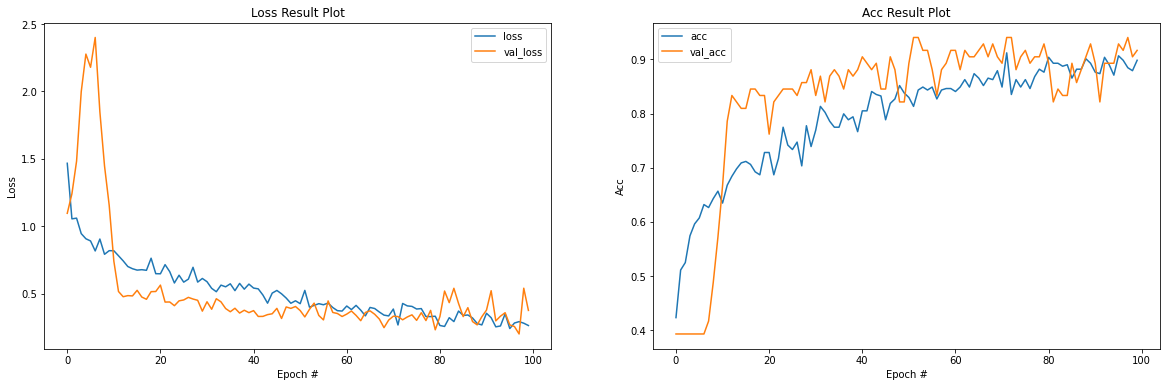

In [ ]:
#plot model 1
fig, (plt1, plt2) = plt.subplots(1,2, figsize=(20,6)) #buat bikin subplot

plt1.figsize=(10,8)
plt1.plot(np.arange(0, 100), H2.history["loss"], label="loss")
plt1.plot(np.arange(0, 100), H2.history["val_loss"], label="val_loss")
plt1.set_title("Loss Result Plot")
plt1.set_xlabel("Epoch #")
plt1.set_ylabel("Loss")
plt1.legend()

plt2.figsize=(10,8)
plt2.plot(np.arange(0, 100), H2.history["accuracy"], label="acc")
plt2.plot(np.arange(0, 100), H2.history["val_accuracy"], label="val_acc")
plt2.set_title("Acc Result Plot")
plt2.set_xlabel("Epoch #")
plt2.set_ylabel("Acc")
plt2.legend()

In [ ]:
#Evaluasi menggunakan classification report
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix


ypred = model2.predict(validation_generator)
prediction2 = np.argmax(ypred, axis=1)
print(classification_report(validation_generator.classes, prediction2))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92        33
           1       0.97      0.85      0.90        33
           2       1.00      0.89      0.94        18

    accuracy                           0.92        84
   macro avg       0.94      0.91      0.92        84
weighted avg       0.93      0.92      0.92        84



Confusion matrix, without normalization
[[33  0  0]
 [ 5 28  0]
 [ 1  1 16]]


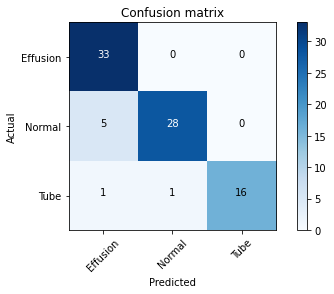

In [ ]:
#Evaluasi menggunakan confusion matrix

import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Actual')
    plt.xlabel('Predicted')

cnf_matrix=confusion_matrix(validation_generator.classes,prediction2)
plot_confusion_matrix(cnf_matrix, classes=validation_generator.class_indices)